# Image Recognition

### In this notebook we will work on the embedding and train a Support Vector Machine Linear model to recognize faces from the embedding

In [1]:
# Mounting Google Drive
from google.colab import drive
from os.path import join
ROOT = '/content/drive'
print(ROOT)
drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [29]:
%pwd

'/content/drive/My Drive/Colab Notebooks/ProjectData/FaceRecognition'

In [66]:
%cd /content/drive/My\ Drive/Colab Notebooks/ProjectData/FaceRecognition

/content/drive/My Drive/Colab Notebooks/ProjectData/FaceRecognition


In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
import matplotlib.pyplot as plt 

In [68]:
output_path = "pickle/"

In [76]:
path = output_path+"face_dataset_Caffemodel.pickle"
data = pickle.load(open(path, "rb"))

In [77]:
label_name = data['name']

label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label_name)

embedding  = data['embedding']
print(len(embedding))

2087


In [78]:
X_train, X_test, y_train, y_test = train_test_split(embedding, label,test_size = 0.2 , shuffle = True, stratify = label)

(array([35., 33., 46., 50., 37., 48., 40., 54., 30., 45.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

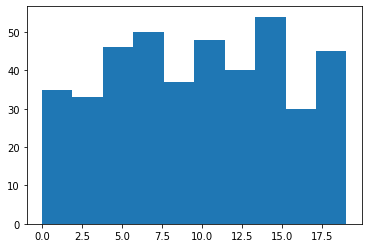

In [79]:
plt.hist(y_test)

In [80]:
recognizer = SVC(C=1.0, kernel="linear", probability=True)
model_hist = recognizer.fit(X_train, y_train)

In [81]:
model_hist.score(X_train, y_train)

0.5721989215098862

In [82]:
model_hist.score(X_test, y_test)

0.5334928229665071

In [83]:
f = open(output_path+"label_encoder_dataset_celeb.pickle","wb")
f.write(pickle.dumps(label_encoder))
f.close()

In [84]:
f = open(output_path+"recognizer_dataset_celeb.pickle","wb")
f.write(pickle.dumps(recognizer))
f.close()